# Plot Training Data

Import packages

In [1]:
from packaging import version

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorboard as tb
import os
from sklearn.metrics import mean_squared_error

import scienceplots

mpl.rc_file_defaults()
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["legend.edgecolor"] = 'black'
plt.rc('legend', fontsize=10)



def cleanData(data):
    # Multiply z to be positive upwards
    data.loc[:, "z"] *= -1
    # Convert angles to degrees
    data.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi
    return data

def post_process(data,
              real_values=(0, 0, 5,),
              cols=('x', 'y', 'z',),
              z_settling_time=0,
              ):
    # Compute the RMSE for each column
    for i, col in enumerate(cols):
        pred = data[col]

        if col == 'z':
            pred = data.query('real_time >= @z_settling_time')[col]
            z_sse = pred.mean() - real_values[i]
            print(f'SSE for {col}: {z_sse:.5f}')

        # Get the predicted values and compute the RMSE
        true = real_values[i] * np.ones(len(pred))
        rmse = mean_squared_error(true, pred, squared=False)

        # Print the RMSE
        print(f'RMSE for {col}: {rmse:.5f}')

## Plot Model B.2 in the Nominal Case

Getting Data
Cleaning Data
Plotting Data


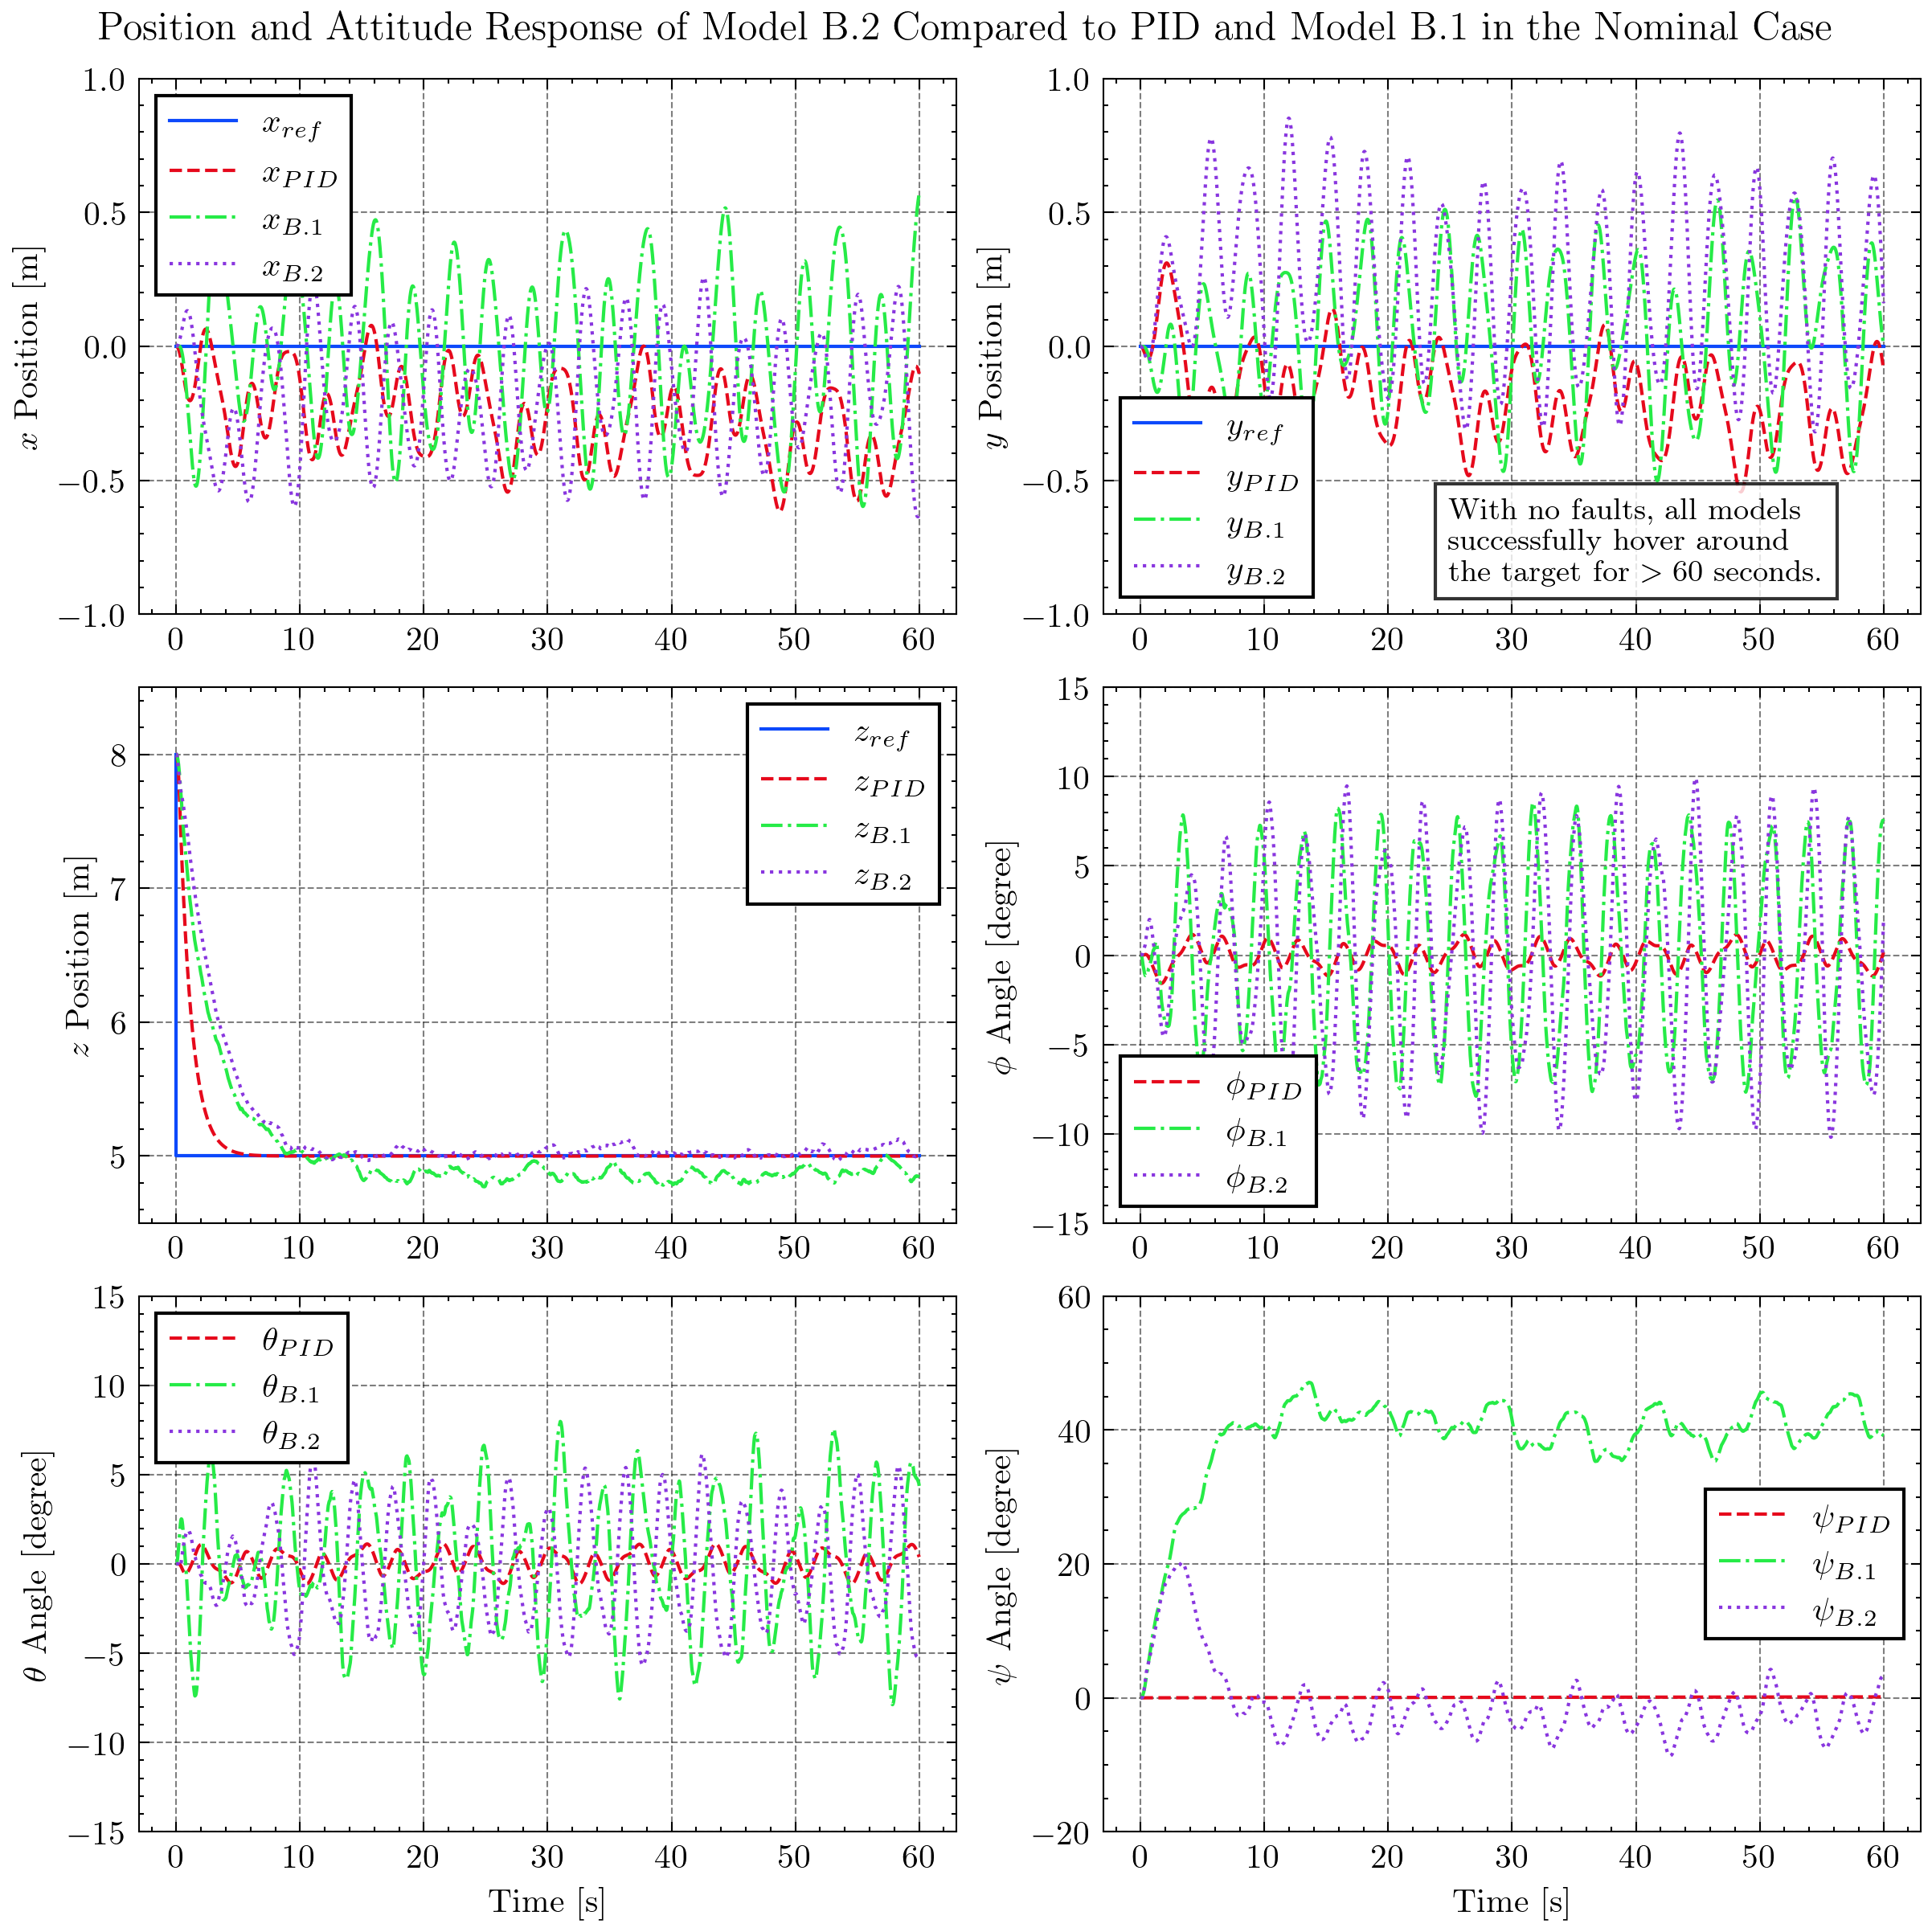

Closing Plots


In [2]:
print("Getting Data")


B3_C1_data = pd.read_csv("data/ModelB.2-nominal.csv")
B1_C1_data = pd.read_csv("data/ModelB.1-nominal.csv")
PID_C1_data = pd.read_csv("data/PID-nominal.csv")

# Data cleaning
print("Cleaning Data")

B3_C1_data = cleanData(B3_C1_data)
B1_C1_data = cleanData(B1_C1_data)
PID_C1_data = cleanData(PID_C1_data)


symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-1, 1],
    [-1, 1],
    [4.5, 8.5],
    [-15, 15],
    [-15, 15],
    [-20, 60],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 3
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(8, 8), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        ax[row, col].plot(PID_C1_data.iloc[:, 1], PID_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")
        B1_line = ax[row, col].plot(B1_C1_data.iloc[:, 1], B1_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.1}$")
        B3_line = ax[row, col].plot(B3_C1_data.iloc[:, 1], B3_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.2}$")

        # final_point = RL_data.iloc[-1, [1, i + 2]]
        # ax[row, col].plot(final_point[0], final_point[1], 'x', color=l1[0].get_color())

        # final_point = RL_data_modelA1.iloc[-1, [1, i + 2]]
        # ax[row, col].plot(final_point[0], final_point[1], 'x', color=l2[0].get_color())

        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 2 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

# Create the text box
text = "With no faults, all models\n" \
       "successfully hover around\n" \
       "the target for $>60$ seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
fig.text(0.75, 0.7, text, fontsize=9, bbox=bbox, transform=fig.transFigure)


plt.suptitle("Position and Attitude Response of Model B.2 Compared to PID and Model B.1 in the Nominal Case")

# plt.savefig(f'images/nominalCaseComparison-v3.png', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


In [4]:
print(f'SSE for x: {B3_C1_data["x"].mean():.5f}')
post_process(B3_C1_data, z_settling_time=7.35)

SSE for x: -0.18795
RMSE for x: 0.29404
RMSE for y: 0.39317
SSE for z: 0.03370
RMSE for z: 0.05626


## Plot Model B.2 in the Faulty Case

Plotting Data


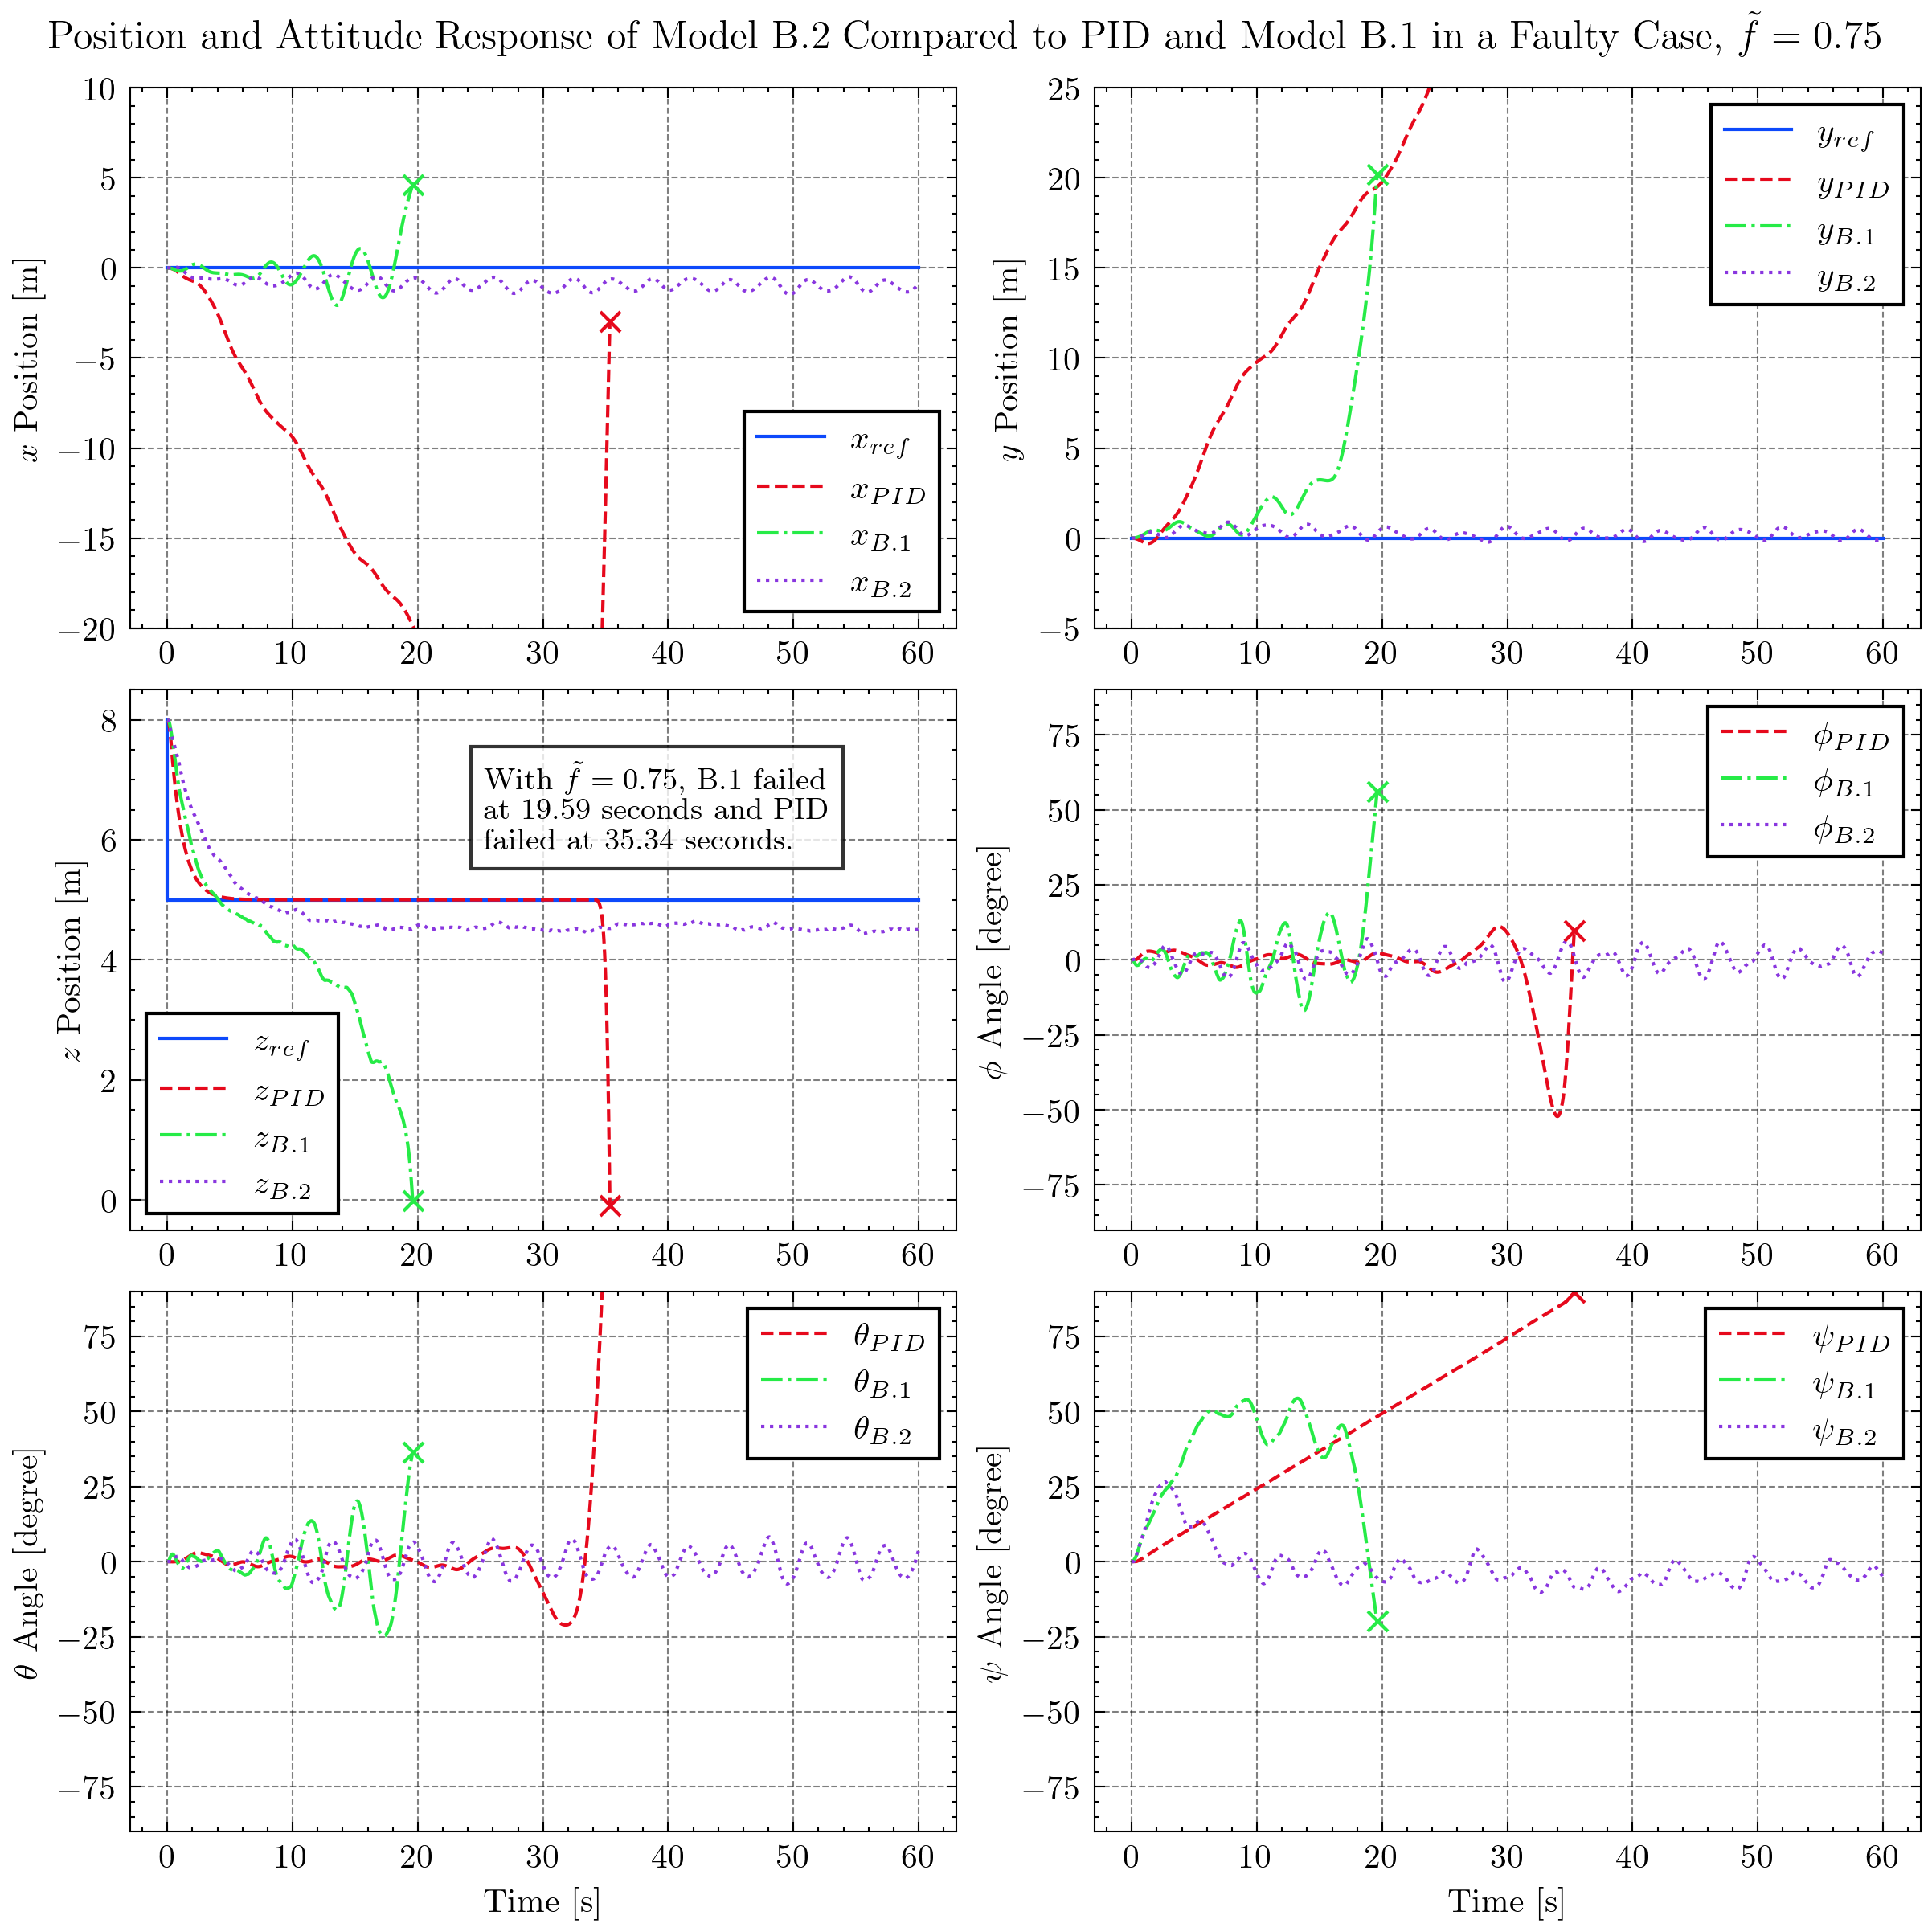

Closing Plots


In [3]:

B3_C5_data = pd.read_csv("data/ModelB.2-faulty.csv")
B1_C5_data = pd.read_csv("data/ModelB.1-faulty.csv")
PID_C5_data = pd.read_csv("data/PID-faulty.csv")

B3_C5_data = cleanData(B3_C5_data)
B1_C5_data = cleanData(B1_C5_data)
PID_C5_data = cleanData(PID_C5_data)


symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-20, 10],
    [-5, 25],
    [-0.5, 8.5],
    [-90, 90],
    [-90, 90],
    [-90, 90],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 3
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(8, 8), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        PID_line = ax[row, col].plot(PID_C5_data.iloc[:, 1], PID_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")
        B1_line = ax[row, col].plot(B1_C5_data.iloc[:, 1], B1_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.1}$")
        B3_line = ax[row, col].plot(B3_C5_data.iloc[:, 1], B3_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.2}$")

        final_point = B1_C5_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=B1_line[0].get_color())

        final_point = PID_C5_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=PID_line[0].get_color())

        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 2 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "With $\\tilde{f}=0.75$, B.1 failed\n" \
       "at 19.59 seconds and PID\n" \
       "failed at 35.34 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
fig.text(0.25, 0.56, text, fontsize=9, bbox=bbox, transform=fig.transFigure)

plt.suptitle("Position and Attitude Response of Model B.2 Compared to PID and Model B.1 in a Faulty Case, $\\tilde{f}=0.75$")

plt.savefig(f'images/faultyCaseComparison-v3.png', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


In [6]:
print(f'SSE for x: {B3_C5_data["x"].mean():.5f}')
post_process(B3_C5_data, z_settling_time=11.05)

SSE for x: -0.88154
RMSE for x: 0.93487
RMSE for y: 0.35912
SSE for z: -0.45349
RMSE for z: 0.45631
